In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode,iplot,plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.tools import FigureFactory as ff

from wordcloud import WordCloud

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/videogamesales/vgsales.csv


In [2]:
data=pd.read_csv("../input/videogamesales/vgsales.csv")

# INTRODUCTION 

    Bu kernelde, video oyunları satışları isimli veriseti analiz edilerek, plotly kütüphanesi ile görselleştirme hedeflenmiştir.
    
    Rank - Genel Satışların Sıralaması
    Name - Oyun ismi
    Platform - Oyun sürümü,platformu (i.e. PC,PS4, etc.)
    Year - Oyunun çıkış yılı
    Genre - Oyunun Türü
    Publisher - Oyun Yayıncısı
    NA_Sales - Kuzey Amerika'da satışlar (millions)
    EU_Sales - Avrupada satışlar (in millions)
    JP_Sales - Japonyada satışlar (in millions)
    Other_Sales - Diğer ülkelerde satışlar (in millions)
    Global_Sales - Dünya çapında toplam satış
    
    
    -----------------------------------------------------------------------------------------------------
    This kernel is analyzed with the dataset called video games sales, visualization is aimed with plotly libraries.
    
    Rank - Ranking of overall sales
    Name - The games name
    Platform - Platform of the games release (i.e. PC,PS4, etc.)
    Year - Year of the game's release
    Genre - Genre of the game
    Publisher - Publisher of the game
    NA_Sales - Sales in North America (in millions)
    EU_Sales - Sales in Europe (in millions)
    JP_Sales - Sales in Japan (in millions)
    Other_Sales - Sales in the rest of the world (in millions)
    Global_Sales - Total worldwide sales.
<br>
* [Dataset nitelik incelemesi (Loading Data and Explanation of Features)](#1)
* [En iyi 100 Yayıncı,Platform ve Tür (Top 100 Publishers, Platforms and Genres)](#2)
* [En iyi 100 Video Oyunu Satışları (Top 100 Video Game Sales)](#3)
* [Global Satış ve Yayıncılarına Göre En iyi 100 video Oyununun Çıkış Yılları (Release Years of Top 100 Video Games According to Global Sales and Publishers)](#4)
* [En iyi 5 Video Oyununun 2011 yılında Global Satışları (Global Sales of the Top 5 Video Games in 2011)](#5)
* [En çok Satış Yapan Oyun Türleri (Top Selling Game Genre's)](#6)
* [Yıl, Platform, Kuzey Amerika ve Avrupa Satışlarına Göre En iyi 100 Video Oyunu Arasındaki İlişki (Relationship Between The 100 Best Video Games By Year, Platform, North America, and Europe Sales)](#7)
* [Türlere Göre Satış Oranları (Sales Rates by Genre)](#8)
* [Tür ve Platform Arasındaki İlişki (Relationship Between Genre and Platform)](#9)
* [Tür ve Platform'a Göre Global Satışlar (Global Sales by Type and Platform)](#10)
* [Tür ve Bölgelere Göre Satışlar (North America, Europe, Japan and Other Sales Percentage and Amounts According to Genre)](#11)
* [Oyun İsimleri ile Kelime Bulutu (Word Cloud with Game Names)](#12)
* [En iyi 100 oyunun çıkış yılları, global satışları ve yayıncıları ile 3D kabarcık grafiğinde gösterimi (Release year of the top 100 video games with 3d bubble, global sale and publisher)](#13)

<a id="1"></a> <br>
# Dataset nitelik incelemesi (Loading Data and Explanation of Features)

In [3]:
data.info()
# Dataset toplam 11 feature'den oluşuyor
# 6 float tipinde, 1 integer tipinde ve 4 feature'da object(string) tipinde.
# 1659 adet kayıt(sample) bulunuyor. İndexlemesi 0 ila 16597 arası.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
data.notnull().all()  # "Data içerisindeki hiçbir kolonda null değer yok?" dedik ve bize dönen cevap
# Year ve Publisher'da null var

Rank             True
Name             True
Platform         True
Year            False
Genre            True
Publisher       False
NA_Sales         True
EU_Sales         True
JP_Sales         True
Other_Sales      True
Global_Sales     True
dtype: bool

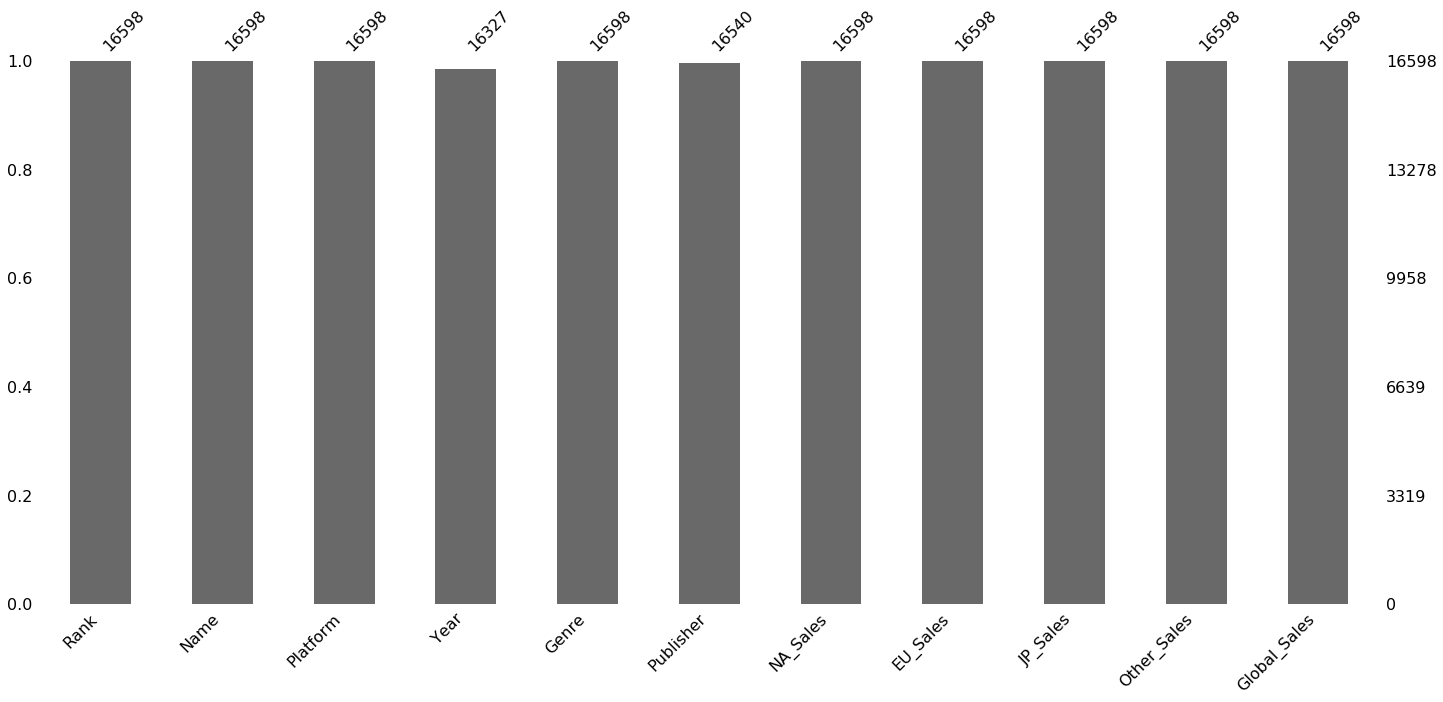

In [5]:
import missingno as msno
msno.bar(data)
#msno.matrix(data)
#msno.heatmap(data)
plt.show()
# Sonuçlara bakıldığında  Year featuresinde 271 adet , Publisher featuresinde 58 adet null değer bulunmaktadır.

In [6]:
# Herhangi bir feature'Nin herhangi bir satırında null değeri var ise, ilgili sample'yi (null değere ait tüm feature değerleri) yok et.
# Null values are removed from the dataset.
data.dropna(how="any",inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16291 non-null int64
Name            16291 non-null object
Platform        16291 non-null object
Year            16291 non-null float64
Genre           16291 non-null object
Publisher       16291 non-null object
NA_Sales        16291 non-null float64
EU_Sales        16291 non-null float64
JP_Sales        16291 non-null float64
Other_Sales     16291 non-null float64
Global_Sales    16291 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [7]:
# Then convert data from float to int
# Float tipinde Year Featuresi integer tipine çevriliyor.
data['Year'] = data['Year'].astype(int)
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


<a id="2"></a> <br>
# En iyi 100 Yayıncı,Platform ve Tür (Top 100 Publishers, Platforms and Genres)

In [8]:
dataTop100=data.head(100)

trace1=go.Histogram(
    y=dataTop100.Publisher,
    name="Publisher",
    #xbins=dict(start=-3.0,end=4,size=0.5),
    opacity=0.75,
    marker=dict(color='rgba(171, 50, 96, 0.6)'))
trace2=go.Histogram(
    y=dataTop100.Platform,
    name="Platform",
    opacity=0.75,
    marker=dict(color='rgba(12, 50, 196, 0.6)'))
trace3=go.Histogram(
    y=dataTop100.Genre,
    name="Genre",
    opacity=0.75,
    marker=dict(color='rgba(16, 112, 2, 0.6)'))

data_new=[trace1,trace2,trace3]
layout_new=go.Layout(
    barmode='overlay',
    title='En iyi 100 yayıncı,platform ve tür',
    yaxis=dict(title='Yayıncı,Platform,Genre'),
    xaxis=dict(title='Count'),
    bargap=0.2,
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor="rgb(243, 243, 243)",
)
fig=go.Figure(data=data_new,layout=layout_new)
iplot(fig)

<a id="3"></a> <br>
# En iyi 100 Video Oyunu Satışları (Top 100 Video Game Sales)

In [9]:
datatop100 = data.head(100)

trace1=go.Scatter(
        x=datatop100.Rank,
        y=datatop100.NA_Sales,
        name="Kuzey Amerika Satışları",
        mode="markers",
        marker=dict(color='rgba(4,122,24,0.7)',size=8),
        text=datatop100.Name
)
trace2=go.Scatter(
    x=datatop100.Rank,
    y=datatop100.EU_Sales,
    name="Avrupa Satışları",
    mode="markers",
    marker=dict(color='rgba(255,5,5,0.7)',size=8),
    text=datatop100.Name
)
trace3=go.Scatter(
    x=datatop100.Rank,
    y=datatop100.JP_Sales,
    name="Japonya Satışları",
    mode="markers",
    marker=dict(color='rgba(102,29,36,0.7)',size=8),
    text=datatop100.Name
)
trace4=go.Scatter(
    x=datatop100.Rank,
    y=datatop100.Other_Sales,
    name="Diğer Dünya Ülke Satışları",
    mode="markers",
    marker=dict(color='rgba(164,44,237,0.7)',size=5),
    text=datatop100.Name
)

new_data = [trace1, trace2, trace3, trace4]
layout = dict(title = 'Kuzey Amerika, Avrupa,Japonya ve Diğer Ülke Satışları',
              xaxis= dict(title= 'Sıralama',ticklen= 5,zeroline= False,zerolinewidth=1,gridcolor="white"),
              yaxis= dict(title= 'Satışlar',ticklen= 5,zeroline= False,zerolinewidth=1,gridcolor="white",),
              paper_bgcolor='rgb(243, 243, 243)',
              plot_bgcolor='rgb(243, 243, 243)' )
fig = dict(data = new_data, layout = layout)
iplot(fig)

<a id="4"></a> <br>
# Global Satış ve Yayıncılarına Göre En iyi 100 video Oyununun Çıkış Yılları (Release Years of Top 100 Video Games According to Global Sales and Publishers)

In [10]:
# x ekseni Sıralaması (Rank)
# y ekseni Çıkış Yılları
# Noktaların(marker) büyüklüğü ve renk tonları: Kuzey Amerika Satışları

import plotly.express as px #renk paleti için olmasada olur

datatop100=data.head(100)
fig={
    "data": [
        {
            'x':datatop100.Rank,
            'y':datatop100.Year,
            'mode':'markers',
            'marker':{
                'color':datatop100.Global_Sales,
                'size' :datatop100.Global_Sales,
                'showscale':True,
                "colorscale":px.colors.diverging.BrBG
            },
            "text":"Name:"+datatop100.Name+","+"Publisher:"+datatop100.Publisher
        },
    ],
    "layout":
        {
            "title":"Global Satış ve Yayıncılarına Göre En iyi 100 video Oyununun Çıkış Yılları" ,
            "xaxis":{
                "title":"Rank",
                "gridcolor":"rgb(255,255,255)",
                "zerolinewidth":1,
                "ticklen":5,
                "gridwidth":1
            },
           "yaxis":{
                "title":"Years",
                "gridcolor":"rgb(255,255,255)",
                "zerolinewidth":1,
                "ticklen":5,
                "gridwidth":2
            },
            "paper_bgcolor":'rgb(248, 248, 255)',
            "plot_bgcolor": 'rgb(248, 248, 255)'
        }
}
iplot(fig)


<a id="5"></a> <br>
# En iyi 5 Video Oyununun 2011 yılında Global Satışları              (Global Sales of the Top 5 Video Games in 2011)

In [11]:
 #2011 yılına filtrelenmiş datasetin ilk 5 samplesi sadece Name,Na_Sales ve Global_Sales Featureleri
df2011=data[data.Year==2008].iloc[0:5,:]

fig = {
  "data": [
    { #trace oluşturuluyor
      "values": df2011.Global_Sales,
      "labels": df2011.Name,
      "domain": {"x": [0, .5]},
      "name": "Sonuçlar",
      "hoverinfo":"label+percent+name", #Feature Name + Oran + genel isim
      "hole": .2,  # oluşacak pie çhartı ortasındaki deliğin büyüklüğü
      "type": "pie" # trace'in tipi
    },],
  "layout": {  #layout oluşturuluyor
        "title":"2011 Yılındaki Global Satışlarının, Video oyun oranları",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "2011 Yılındaki Global Satışlar",
                "x": 0.20,
                "y": 1
            },
        ]
    }
}
iplot(fig)

<a id="6"></a> <br>
# En çok Satış Yapan Oyun Türleri (Top Selling Game Genre's)

In [12]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


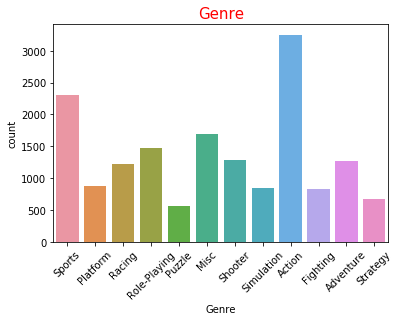

In [13]:
sns.countplot(data.Genre)
plt.title("Genre",color = 'Red',fontsize=15)
plt.xticks(rotation=45)
plt.show()

<a id="7"></a> <br>
# Yıl, Platform, Kuzey Amerika ve Avrupa Satışlarına Göre En iyi 100 Video Oyunu Arasındaki İlişki (Relationship Between The 100 Best Video Games By Year, Platform, North America, and Europe Sales)

In [14]:
df100=data.head(100)
data2=df100.loc[:,["Year","Platform","NA_Sales","EU_Sales"]]
data2["index"]=np.arange(1,len(df100)+1) #data2 add new columns name=index, value=0,length df100frame +1

fig = ff.create_scatterplotmatrix(data2, 
                                  diag='box', 
                                  index='index',
                                  colormap='Portland',
                                  colormap_type='seq',
                                  height=1000, width=1200)
iplot(fig)
plt.show()


/opt/conda/lib/python3.6/site-packages/plotly/tools.py:592: UserWarning:

plotly.tools.FigureFactory.create_scatterplotmatrix is deprecated. Use plotly.figure_factory.create_scatterplotmatrix



<a id="8"></a> <br>
# Türlere Göre Satış Oranları (Sales Rates by Genre)

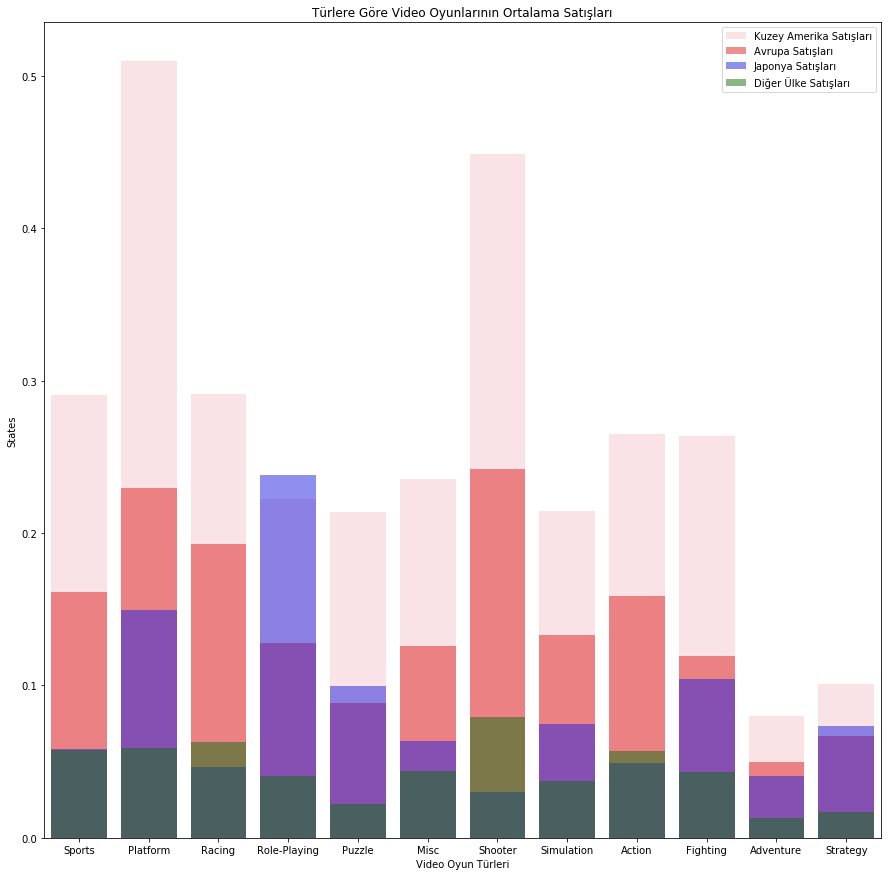

In [15]:
genre_list=list(data.Genre.unique())
NA_list=[]
EU_list=[]
JP_list=[]
OT_list=[]

filtre=data.Genre

for i in genre_list:
    x=data[filtre == i]
    NA_list.append(sum(x.NA_Sales) / len(x))
    EU_list.append(sum(x.EU_Sales) / len(x))
    JP_list.append(sum(x.JP_Sales) / len(x))
    OT_list.append(sum(x.Other_Sales) / len(x))
    
f,ax = plt.subplots(figsize=(15,15))

sns.barplot(x=genre_list , y=NA_list, color='pink', alpha=0.5, label='Kuzey Amerika Satışları')
sns.barplot(x=genre_list , y=EU_list, color='red', alpha=0.5, label='Avrupa Satışları')
sns.barplot(x=genre_list , y=JP_list, color='blue', alpha=0.5, label='Japonya Satışları')
sns.barplot(x=genre_list , y=OT_list, color='green', alpha=0.5, label='Diğer Ülke Satışları')

ax.legend(loc='upper right' , frameon=True) 
ax.set(xlabel='Video Oyun Türleri', ylabel='States', title="Türlere Göre Video Oyunlarının Ortalama Satışları")
plt.show()

<a id="9"></a> <br>
# Tür ve Platform Arasındaki İlişki (Relationship Between Genre and Platform)

In [16]:
data.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [17]:
sport_filter=data[data.Genre=="Sports"]
platform_filter=data[data.Genre=="Platform"]
racing_filter=data[data.Genre=="Racing"]
role_filter=data[data.Genre=="Role-Playing"]
puzzle_filter=data[data.Genre=="Puzzle"]
misc_filter=data[data.Genre=="Misc"]
shooter_filter=data[data.Genre=="Shooter"]
simulation_filter=data[data.Genre=="Simulation"]
action_filter=data[data.Genre=="Action"]
fighting_filter=data[data.Genre=="Fighting"]
adventure_filter=data[data.Genre=="Adventure"]
strategy_filter=data[data.Genre=="Stragety"]

In [18]:


trace1=go.Histogram(
    x=sport_filter.Platform,
    opacity=0.7,
    name="Sports",
    marker=dict(color='rgba(151,255,255,0.7)'))
trace2=go.Histogram(
    x=platform_filter.Platform,
    opacity=0.7,
    name="Platform",
    marker=dict(color="rgba(74,128,77,0.7)"))
trace3=go.Histogram(
    x=racing_filter.Platform,
    opacity=0.7,
    name="Racing",
    marker=dict(color="rgba(139,101,139,0.7)"))
trace4=go.Histogram(
    x=role_filter.Platform,
    opacity=0.7,
    name="Role-Playing",
    marker=dict(color="rgba(238,232,170,0.7)"))
trace5=go.Histogram(
    x=puzzle_filter.Platform,
    opacity=0.7,
    name="Puzzle",
    marker=dict(color="rgba(139,69,19,0.7)"))
trace6=go.Histogram(
    x=misc_filter.Platform,
    opacity=0.7,
    name="Misc",
    marker=dict(color="rgba(253 ,245 ,230,0.7)"))
trace7=go.Histogram(
    x=shooter_filter.Platform,
    opacity=0.7,
    name="Shooter",
    marker=dict(color="rgba(255 ,228 ,181,0.7)"))
trace8=go.Histogram(
    x=simulation_filter.Platform,
    opacity=0.7,
    name="Simulation",
    marker=dict(color="rgba(205, 133, 63,0.7)"))
trace9=go.Histogram(
    x=action_filter.Platform,
    opacity=0.7,
    name="Action",
    marker=dict(color="rgba(116,173,209,0.7)"))
trace10=go.Histogram(
    x=fighting_filter.Platform,
    opacity=0.7,
    name="Fighting",
    marker=dict(color="rgba(1,15,139,0.7)"))
trace11=go.Histogram(
    x=adventure_filter.Platform,
    opacity=0.7,
    name="Adventures",
    marker=dict(color="rgba(205 ,201, 201,0.7)"))
trace12=go.Histogram(
    x=strategy_filter.Platform,
    opacity=0.7,
    name="Stragety",
    marker=dict(color="rgba(255, 222 ,173,0.7)"))

data_new=[trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9,trace10,trace11,trace12]
layout_new = go.Layout(barmode='stack',
                   title='Genre Counts According to Platform',
                   xaxis=dict(title='Platform'),
                   yaxis=dict( title='Count'),
                   paper_bgcolor='beige',
                   plot_bgcolor='beige'
)
fig = go.Figure(data=data_new, layout=layout_new)
iplot(fig)

<a id="10"></a> <br>
# Tür ve Platform'a Göre Global Satışlar (Global Sales by Type and Platform)

    Örnek Yapılabilecek Bir Çıkarım: Türü(Genre) Aksiyon, Platformu PS olan video oyunlarının Globalde Satışından elde edilen miktar (milyon) cinsinden.

In [19]:
sport_filter.Platform.unique() # 25 Farklı(unique) Platform değeri bulunmaktadır.

array(['Wii', 'PS4', 'PS3', 'X360', 'DS', 'PS', 'PS2', 'NES', 'XOne',
       'N64', 'GB', 'GEN', 'PSP', 'XB', 'GC', 'PC', 'SNES', 'DC', '3DS',
       'GBA', 'WiiU', 'PSV', '2600', 'SAT', 'NG'], dtype=object)

    x=sport_filter.groupby("Platform")["Global_Sales"].sum().index
    y=sport_filter.groupby("Platform")["Global_Sales"].sum().values
    
    Yukarıdaki iki kullanıma baktığımızda, sport_filter.groupby("Platform") ile benim output'um platform kolonuna göre yapılandırılsın dedik.
    Yani Platform kolonunda 25 adet uniq değer olduğuna göre, outputum'da sadece uniq olarak Platformlar bulunsun dedik.
    
    sport_filter.groupby("Platform")["Global_Sales"].sum() ifadesinin tamamını ele alırsak: Platformlara göre yapılandırılan(gruplanan) sample'ların "Global_Sales" kolonlarına(feature) bak ve bunları topla(sum) dedik. Yani 100 adet sample olduğunu düşünürsek Platform feature'sinde örneğin 1. uniqe değer olan "Wii" platform değerine karşılık gelen bütün Global_Sales değerlerini topla ve aynı işlemi kalan 24 platform türü içinde yap demiş olduk.
    
    index ile bunların indislerine ulaştık,values ile ise her bir indise karşılık gelen değere yani sum edilmiş global_sales'e ulaştık.

In [20]:
sport_filter=data[data.Genre=="Sports"]
platform_filter=data[data.Genre=="Platform"]
racing_filter=data[data.Genre=="Racing"]
role_filter=data[data.Genre=="Role-Playing"]
puzzle_filter=data[data.Genre=="Puzzle"]
misc_filter=data[data.Genre=="Misc"]
shooter_filter=data[data.Genre=="Shooter"]
simulation_filter=data[data.Genre=="Simulation"]
action_filter=data[data.Genre=="Action"]
fighting_filter=data[data.Genre=="Fighting"]
adventure_filter=data[data.Genre=="Adventure"]
strategy_filter=data[data.Genre=="Stragety"]

In [21]:
trace1=go.Bar(
    x=sport_filter.groupby("Platform")["Global_Sales"].sum().index,
    y=sport_filter.groupby("Platform")["Global_Sales"].sum().values,
    name="Sports",
    marker=dict(color='rgba(151,255,255,0.7)'))
trace2=go.Bar(
    x=platform_filter.groupby("Platform")["Global_Sales"].sum().index,
    y=platform_filter.groupby("Platform")["Global_Sales"].sum().values,
    name="Platforms",
    marker=dict(color='rgba(74,128,77,0.7)'))
trace3=go.Bar(
    x=racing_filter.groupby("Platform")["Global_Sales"].sum().index,
    y=racing_filter.groupby("Platform")["Global_Sales"].sum().values,
    name="Racings",
    marker=dict(color='rgba(139,101,139,0.7)'))
trace4=go.Bar(
    x=role_filter.groupby("Platform")["Global_Sales"].sum().index,
    y=role_filter.groupby("Platform")["Global_Sales"].sum().values,
    name="Roles",
    marker=dict(color='rgba(238,232,170,0.7)'))
trace5=go.Bar(
    x=puzzle_filter.groupby("Platform")["Global_Sales"].sum().index,
    y=puzzle_filter.groupby("Platform")["Global_Sales"].sum().values,
    name="Puzzles",
    opacity=0.7,
    marker=dict(color='red'))
trace6=go.Bar(
    x=misc_filter.groupby("Platform")["Global_Sales"].sum().index,
    y=misc_filter.groupby("Platform")["Global_Sales"].sum().values,
    name="Miscs",
    marker=dict(color="rgba(255,228,181,0.7)"))
trace7=go.Bar(
    x=shooter_filter.groupby("Platform")["Global_Sales"].sum().index,
    y=shooter_filter.groupby("Platform")["Global_Sales"].sum().values,
    name="Shooters",
    marker=dict(color="rgba(205,133,63,0.7)"))
trace8=go.Bar(
    x=simulation_filter.groupby("Platform")["Global_Sales"].sum().index,
    y=simulation_filter.groupby("Platform")["Global_Sales"].sum().values,
    name="Simulations",
    marker=dict(color="rgba(116,173,209,0.7)"))
trace9=go.Bar(
    x=action_filter.groupby("Platform")["Global_Sales"].sum().index,
    y=action_filter.groupby("Platform")["Global_Sales"].sum().values,
    name="Actions",
    marker=dict(color="rgba(188,145,202,0.7)"))
trace10=go.Bar(
    x=fighting_filter.groupby("Platform")["Global_Sales"].sum().index,
    y=fighting_filter.groupby("Platform")["Global_Sales"].sum().values,
    name="Fightings",
    marker=dict(color='rgba(104,57,119,0.7)'))
trace11=go.Bar(
    x=adventure_filter.groupby("Platform")["Global_Sales"].sum().index,
    y=adventure_filter.groupby("Platform")["Global_Sales"].sum().values,
    name="Adventures",
    marker=dict(color='rgba(245,253,104,0.7)'))
trace12=go.Bar(
    x=strategy_filter.groupby("Platform")["Global_Sales"].sum().index,
    y=strategy_filter.groupby("Platform")["Global_Sales"].sum().values,
    name="Stragetys",
    marker=dict(color='rgba(138,72,40,0.7)'))
                
data_new=[trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9,trace10,trace11,trace12]      

layout_new = go.Layout(
    barmode='stack',
    title='Total Global Sales According to Platform and Genre',
    xaxis=dict(title='Platform'),
    yaxis=dict( title='Global Sales(In Millions)'),
    paper_bgcolor='beige',
    plot_bgcolor='beige'
)
fig=go.Figure(data=data_new,layout=layout_new)
iplot(fig)

<a id="11"></a> <br>
# Tür ve Bölgelere Göre Satışlar (North America, Europe, Japan and Other Sales Percentage and Amounts According to Genre)

    1.) Datayı, tür(genre)'e göre gruplayarak, her tür için her bölge(NA,EU,JP,OT,GS) satışlarını bulalım.
    2.) Her bölge satışının global satışa oranını elde edelim.
    3.) Her bölge için türlerin Global satışa olan Sonuçlarımızı Bar ile plot edelim.
    4.) Her bölge için türlerin total satışını veren sonuçlarımızı tabloda listeleyelim
    

In [22]:
genre=pd.DataFrame(data.groupby("Genre")[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]].sum())
genre.reset_index(level=0, inplace=True)   # add index
genrecount=pd.DataFrame(data["Genre"].value_counts())
genrecount.reset_index(level=0, inplace=True) # add index
genrecount.rename(columns={"Genre": "Counts","index":"Genre"}, inplace=True) #dataframe columns rename and save
genre=pd.merge(genre,genrecount,on="Genre") # merge ==> dataframe1 + dataframe2 = new dataframe ==> genre + genrecount = genre



#for Tabla Design
table_data=genre[["Genre","NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]]  # Tablo için genreden belirtilen alanlar çekildi
# Tablo içindeki kolon isimleri değiştirildi.
table_data = table_data.rename(columns = {"NA_Sales": "Kuzey Amerika",  
                                  "EU_Sales":"Avrupa", 
                                  "JP_Sales": "Japonya","Other_Sales":"Diğer","Global_Sales":"Total"})


x=genre.Genre 
NA_Perce=list(genre["NA_Sales"]/genre["Global_Sales"]*100)       #oranlar1
EU_Perce=list(genre["EU_Sales"]/genre["Global_Sales"]*100)       #oranlar2
JP_Perce=list(genre["JP_Sales"]/genre["Global_Sales"]*100)       #oranlar3
Other_Perce=list(genre["Other_Sales"]/genre["Global_Sales"]*100) #oranlar4

trace1=go.Bar(
    x=x,
    y=NA_Perce,
    name='Kuzey Amerika',
    xaxis='x2',yaxis='y2',
    marker=dict(color="blue",
                opacity=0.7,
                line=dict(color='rgb(8,48,107)',width=3)))

trace2=go.Bar(
    x=x,
    y=EU_Perce,
    name='Avrupa',
    xaxis='x2',yaxis='y2',
    marker=dict(color="red",
                opacity=0.7,
                line=dict(color='rgb(8,48,107)',width=3)))

trace3=go.Bar(
    x=x,
    y=JP_Perce,
    name='Japonya',
    xaxis='x2',yaxis='y2',
    marker=dict(color="orange",
                opacity=0.7,
                line=dict(color='rgb(8,48,107)',width=3)))

trace4=go.Bar(
    x=x,
    y=Other_Perce,
    name='Diğer Bölgeler',
    xaxis='x2',yaxis='y2',
    marker=dict(color="purple",
                opacity=0.7,
                line=dict(color='rgb(8,48,107)',width=3)))

trace5=go.Table(                      #Table=> Header,Cells,Domain ==> Table(header,cells,domain),parameter
    header = dict(
    values = table_data.columns,
    line = dict(color = 'rgb(8,48,107)',width=3),
    fill = dict(color = ["darkslateblue","blue","red", "orange","purple","green"]),
    align = ['left','center'],
    font = dict(color = 'white', size = 12),
    height=30,
  ),
    # round ile her bir değer ondalık sayıya yuvarlanıyor.
  cells = dict(
    values = [table_data.Genre,round(table_data["Kuzey Amerika"]),round(table_data["Avrupa"]), round(table_data["Japonya"]), round(table_data["Diğer"]),round(table_data["Total"])],
    height=30,
    line = dict(color = 'rgb(8,48,107)',width=3),   #hücre çizgilerinin renk ve kalınlığı
    fill = dict(color = ["silver","rgb(158,202,225)","darksalmon", "gold","mediumorchid","yellowgreen"]), # Hücrelerin renkleri
    align = ['left', 'center'],
    font = dict(color = '#506784', size = 12)
  ),
    domain=dict(x=[0.60,1],y=[0,0.95]),   # tablonun duracağı konum, belirlenmezse default olarak diğer tracelerin üstünü kapatır.
)

# Create Data (Traceler biraraya toplandı ve figür parametresi için hazır hale geldi.)
data_new = [trace1, trace2,trace3,trace4,trace5]

# Create layout (Layout Oluşturuluyor)
layout_new = go.Layout(barmode='stack',autosize=False,width=1200,height=650,
                legend=dict(
                x=.58, y=0,orientation="h",font=dict(family='Courier New, monospace',size=11,color='#000'),
                bgcolor='beige', bordercolor='beige', borderwidth=1),
                title='North America, Europe, Japan and Other Sales Percentage and Amounts According to Genre',
                
                xaxis2=dict(domain=[0, 0.50],anchor="y2", title='Genre'),
                paper_bgcolor='beige',plot_bgcolor='beige',
                annotations=[ dict( text='Sales Percentage According to Region',
                                    x=0.08,y=1.02,xref="paper",yref="paper",showarrow=False,
                                    font=dict(size=15,family="Courier New, monospace"),
                                    bgcolor="lightyellow",borderwidth=5
                                  ), #dict1 end
                              dict( text='Total Sales(In Millions)'
                                    ,x=0.9,y=1.02,xref="paper",yref="paper",showarrow=False,
                                   font=dict(size=15,family='Courier New, monospace'),
                                   bgcolor="lightyellow",borderwidth=5
                                   )#dickt2 end
                ]# annotations end
)#layout end
fig=go.Figure(data=data_new,layout=layout_new)
iplot(fig)

<a id="12"></a> <br>
# Oyun İsimleri ile Kelime Bulutu (Word Cloud with Game Names)

    from wordcloud import WordCloud
    wordcloud kütüphanesi plotly farklı bir kütüphanedir.

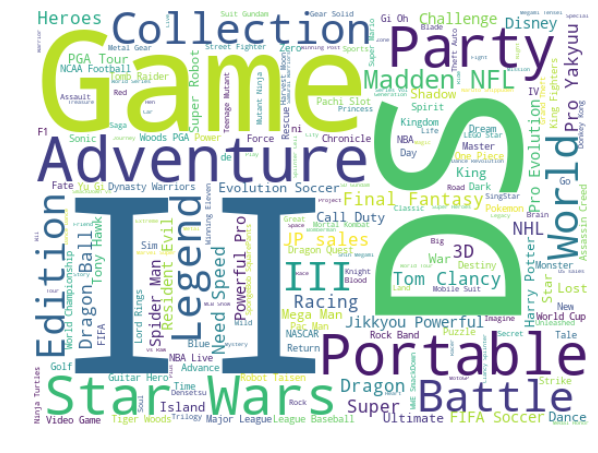

In [23]:
plt.subplots(figsize=(10,10))
wordcloud=WordCloud(
    background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(data.Name)) #kullanılan kelimeleri ayır ve en çok kullanılanları oranlayarak büyüt.
plt.imshow(wordcloud ,interpolation='bilinear')
plt.axis('off')  # x ve y eksenlerini kapat
plt.show()


<a id="13"></a> <br>
# En iyi 100 oyunun çıkış yılları, global satışları ve yayıncıları ile 3D kabarcık grafiğinde gösterimi (Release year of the top 100 video games with 3d bubble, global sale and publisher)
 (3D Bubble Chart with Release Years, Global Sales and Publishers of Top 100 Games)


In [24]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [25]:
datatop100=data.head(100)
#Global_Sales min max yöntemi ile normalize(Her bir değerin (0-1) aralığına indirgenmesi) ediliyor.
datatop100["Norm_Sales"] = (datatop100.Global_Sales - np.min(datatop100.Global_Sales)) / (np.max(datatop100.Global_Sales) - (np.min(datatop100.Global_Sales)))
datatop100.Rank = datatop100.Rank.astype('str') # type=str
datatop100.Global_Sales = datatop100.Global_Sales.astype('str') # type=str
datatop100.Year = datatop100.Year.astype('str') # type = str

trace1=go.Scatter3d(
    x=datatop100.Year,
    y=datatop100.Publisher,
    z=datatop100.Norm_Sales,
    text="Name:" + datatop100.Name + " , " + "Rank: " + datatop100.Rank + " , " 
    +"Year: " + datatop100.Year + " , " +  "Global Sales: " + datatop100.Global_Sales + "Milyon",
    mode='markers',
     marker=dict(
        size=datatop100.NA_Sales, # markerların büyüklükleri Amerika Satışlarına Göre olsun
        color = datatop100.Norm_Sales, #Renk yoğunlukları Normalize edilmiş Global Satışlara göre olsun
        colorscale = "Rainbow",
        colorbar = dict(title = 'Global Satışa Göre'), # renkleri gösteren kısmın başlığı
        line=dict(color='rgb(140, 140, 170)'),)
)
data_new = [trace1]

layout_new=go.Layout(height=800, width=800, 
                    title='En iyi 100 Video Oyununun Çıkış Yılı, Yayıncısı ve Global Satışı',titlefont=dict(color='rgb(20, 24, 54)'),
                    scene = dict(
                    xaxis=dict(title='Çıkış Yılı',titlefont=dict(color='rgb(20, 24, 54)')),
                    yaxis=dict(title='Yayıncı',titlefont=dict(color='rgb(20, 24, 54)')),
                    zaxis=dict(title='Global Satış',titlefont=dict(color='rgb(20, 24, 54)')),
                    bgcolor = 'whitesmoke'
                    ))
fig=go.Figure(data=data_new, layout=layout_new)
iplot(fig)